# Problem Statement
In this problem of linear regression I am going to predict the sales bases on money spent advertising on different platforms such as radio 
television (TV) and newspaper

# Data
I am using the data given in ISLR and analysing the relationship between 'money spent on advertising' and 'sales' using a simple linear regression model.
I will be building a regression model to predict the sales using an appropritae predictor variable

# Reading and Understanding Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:/Users/ACER/OneDrive/Desktop/advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Here we can see the first 5 rows of the our '**advertising.csv**' file. There are altogether 4 columns, Independent variables  '**TV**', '**Radio**', '**Newspaper**' and our dependent variable '**Sales**'

In [3]:
dataset.shape

(610, 4)

We can see that there are altogether **610 rows** (including the titles) and **4 columns** in out dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         610 non-null    float64
 1   Radio      610 non-null    float64
 2   Newspaper  610 non-null    float64
 3   Sales      610 non-null    float64
dtypes: float64(4)
memory usage: 19.2 KB


From the information above we can clearly see that there are **no null-objects (610 rows have values in them)** in all four columns and the datatypes in all the four columns is **float**.Depending on other datesets it can be object or int as well.

In [5]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,610.000000,610.000000,610.000000,610.000000
mean,157.622787,26.451639,30.241967,15.916393
std,83.281028,14.109278,18.830956,5.878454
min,0.700000,0.000000,0.300000,1.600000
25%,87.475000,14.300000,13.100000,11.350000
50%,163.800000,27.500000,29.000000,16.100000
75%,226.475000,38.300000,45.200000,20.575000
max,299.700000,50.000000,114.000000,28.200000


We can see the five number summary of each column in our dataset.
We can further see the five number more clearly using a boxplot which has been constructed below.



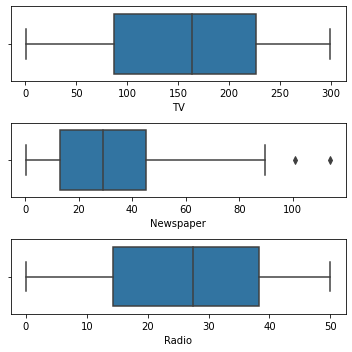

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

I have created a box plot of our indepedent variables here we can see there are no any kind of big outliers in **TV and Radioo** data except in newspaper where there are  **higher outliers**.

**TV**
minimum = 0 Quartile 1 = 90 (approx) Median = 160 (approx)  Quartile 3 = 225(approx) Maximum=300

**Newspaper**
minimum = 0 Quartile 1 = 15 (approx) Median = 30 (approx)  Quartile 3 = 45(approx) Maximum  = 90

**Radio**
minimum = 0 Quartile 15 = 90 (approx) Median = 28 (approx)  Quartile 3 = 38(approx) Maximum = 50

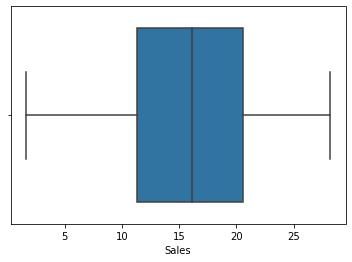

In [7]:
sns.boxplot(dataset['Sales'])
plt.show()

As we can see that there are no outliers in our sales column.

**Sales**
minimum = 1.5 Quartile 1 = 11.5 (approx)  Median = 13 (approx) Quartile 3 = 21.8 (approx) Max = 28.5 (approx)

# Quality of data

In [8]:
dataset['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

we can see that there are no any kind of garbage in our data and every value is unique, all the values are in float data type. 
we don't need to do unique in other columns as all datatype are not null and float type.

# Data Analysis

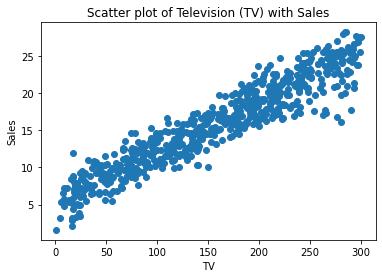

In [9]:
plt.scatter(dataset['TV'],dataset['Sales'])
plt.title('Scatter plot of Television (TV) with Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

From the scatter plot we can see the following

**For TV**

**sales** is aligned in linearly for **TV** so the data seem to be positively co-related and aligned perfectly. Strength of the   data is strong as they are very close to each other nearly a straight line.

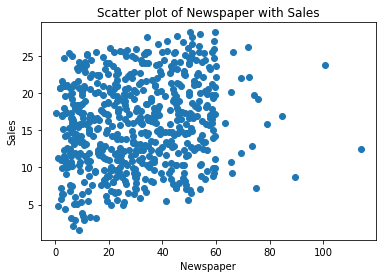

In [10]:
plt.scatter(dataset['Newspaper'],dataset['Sales'])
plt.title('Scatter plot of Newspaper with Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

From the scatter plot above we can see:

**For Newspaper**

**sales** seems to be grouped in left side. There are outliers we can see 2 or 3 dots far from other dots. Strength of the data is moderate as the aren't grouped in a line. There is positive corelation between **sales** and **Newspaper**

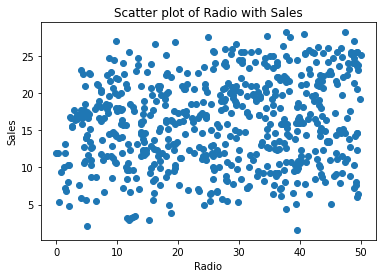

In [11]:
plt.scatter(dataset['Radio'],dataset['Sales'])
plt.title('Scatter plot of Radio with Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

From the Scatter plot above we can seee:

**For Radio**

**sales** is pretty much scattered all over the graph. Ther aren't any outliers. Strength of data is weak as data aren't very close to eachother.


In [12]:
correlation = dataset.corr()
print(correlation['Sales'].sort_values(ascending=False),'\n')

Sales        1.000000
TV           0.941232
Newspaper    0.182284
Radio        0.161986
Name: Sales, dtype: float64 



From the above I have used the corr() function to get the correlation of data with sales and we can clearly see that **TV is highly correlated with Sales as compared to Newspaper and Radio**

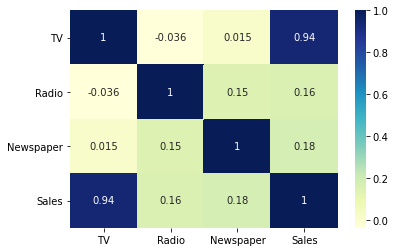

In [13]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

The correlationlies between 0.0 and 1.0. **+** sign represents positive correlation and **-** sign represents negative correlations

**-1.0** represents perfect negative coorelation and **+1.0** represents perfect positive correlation

The thin bar on the right represents the correlation with sales. Upper colors means good correlation and lower colors mean a bad correlation

The 1 on the diagonal mean data are highly correlated with themselves, not others, so the diagonal part has deepblue color with correlation 1

We can clearly see from the heat map that **TV** has the highest correlation **(0.94)** with blue color in it, **Radio** and **Newspaper** have low correlation with **sales** **(0.16 & 0.18 respectively)**  as we can see fading green color in them in the heat map.

# Data cleaning


In [14]:
# Checking Null values
dataset.isnull().sum()*100/dataset.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

As previously said there are no null values in our dataset, hence it is clean.

# remove the outliers

In [15]:
dataset[dataset['Newspaper']>90]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [16]:
dataset=dataset[dataset['Newspaper']<90].reset_index(drop=True)

In [17]:
dataset.shape

(608, 4)

Hence two rows have been removed so there are 4 columns and 608 rows

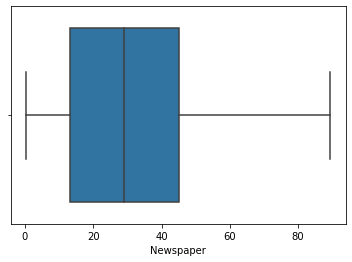

In [18]:
sns.boxplot(dataset['Newspaper'])
plt.show()

We have cleaned the outlier previously present in our independent variable Newspaper. Hence data cleaning is performed since i don't have any categorical data and the data is already polished no need to drop any columns or convert categorical data to numeric.

**Minimum = 0  Quartile 1 = 15 (approx)  Median = 30 (approx)  Quartile 3 = 45(approx)  Maximum = 90**

# Model Building

Performing Simple Linear Regression

Equation of linear regression
y=c+m1x1+m2x2+...+mnxn 

y  is the response
c  is the intercept
m1  is the coefficient for the first feature
mn  is the coefficient for the nth feature

In our case:

y= c+m1×TV + m2xNewpaper + m3xRadio 

The  m  values are called the model coefficients or model parameters.

**Generic Steps in model building using statsmodels**

We first assign the feature variables, TV, Newspaper, Radio in this case, to the variable X and the response variable, Sales, to the variable y.

In [19]:
X = dataset.drop(columns='Sales')    # we don't need the target column in X
y = dataset['Sales']                 # only target column in x

In [20]:
print(X)
print("length of x is: ",len(X))

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
603  244.3   49.2       32.2
604  118.9   36.6       29.0
605  243.7   21.5       42.9
606  172.5   29.5       51.1
607  214.1   16.4       25.1

[608 rows x 3 columns]
length of x is:  608


In [21]:
print(y)
print("length of x is: ",len(y))

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
603    24.0
604    13.6
605    22.7
606    18.7
607    18.9
Name: Sales, Length: 608, dtype: float64
length of x is:  608


# Split the dataset in train set and test set


We now need to split our variable into training and testing sets. we'll perform this by importing train_test_split from the sklearn.model_selection library. 70% of the dataset is in train dataset and rest 30% is in test dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100) 

In [23]:
X_train.head()

,TV,Radio,Newspaper
199,241.2,30.4,28.5
90,28.6,1.5,33.0
481,217.1,43.1,23.1
260,180.9,26.5,6.2
593,133.4,16.8,6.0


In [24]:
y_train.head()

199    22.1
90      7.3
481    20.9
260    15.8
593    11.5
Name: Sales, dtype: float64

**Importing the linear regression from sklearn r2_score and OneHotEncoder**



In [25]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model on the training set

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Predict the test results

In [28]:
y_pred = lr.predict(X_test)  # storing the prediction in y_pred

In [29]:
print("Mean Squared errror : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared errror : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared errror :  1.6408314650527476
Root Mean Squared errror :  1.2809494389134755


**Mean Squared Error (MSE)**

In own word, it is the square of difference of vertical distance of point to the linear regression line.
 
Let's suppose the line is **y=mx+c;   m=slope and c=y-intercept**

one point is **(X1, Y1)** which is not on the linear regression line or the best fit line

our distance will be **(Y1-(mX1+c))** i.e actual vs predicted

**Mean squared error (MSE) =** **(summation of all (actual-predicted)^2)/(total number of points)**


**MSE** is similar to **variance**

**RMSE** is similar to **standard deviation**


Above we are taking out the square root of the mean squared value of our difference between acutal value of y and predicted value of y

# Evaluate the model

In [30]:
r2_score(y_test,y_pred)    # can be used lr.score(X_test,y_test) as well

0.950596454464288

The performance of our regression model is very good as the value of our r square is close to 1 i.e. 0.95

However we don't know whether is our model is biased or not but we can see that the data points will be very close to our best fit line which is good.

# Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [31]:
res = y_test-y_pred

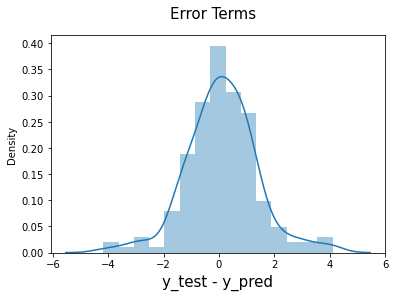

In [32]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)           # Plot heading 
plt.xlabel('y_test - y_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

# plot the results

Text(0.5, 1.0, 'Actual Vs Predicted')

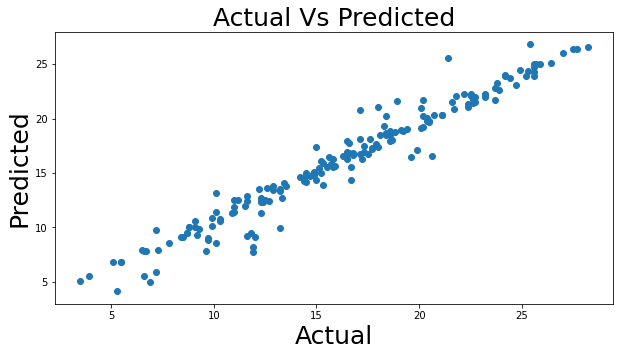

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual', fontsize=25)
plt.ylabel('Predicted',fontsize=25)
plt.title('Actual Vs Predicted', fontsize=25)

Since the scatter plot is linear our model is good.